In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIL Project Colab/Final Project 2/spam_and_ham_classification.csv')

In [ ]:
df.head()

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   9989 non-null   object
 1   text    9989 non-null   object
dtypes: object(2)
memory usage: 156.2+ KB


# Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['label'] = encoder.fit_transform(df['label'])

In [ ]:
#null
df.isnull().sum()

,0
label,0
text,0


In [ ]:
df=df.dropna()

In [ ]:
#Duplicate
df.duplicated().sum()

0

In [ ]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
df.shape

(9989, 2)

In [ ]:
df['label'].value_counts()

,count
label,
0,5294
1,4695


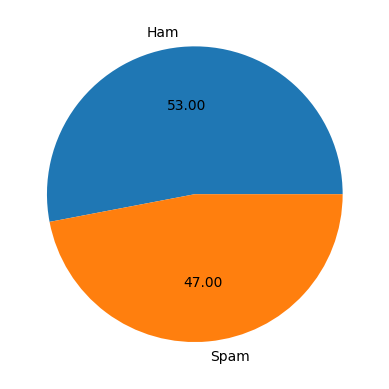

In [ ]:
plt.pie(df['label'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

In [ ]:
df['length']=df['text'].apply(len)

In [ ]:
df.head()

,label,text,length
0,0,into the kingdom of god and those that are ent...,1054
1,1,there was flow at hpl meter 1505 on april firs...,235
2,0,take a look at this one campaign for bvyhprice...,218
3,1,somu wrote actually thats what i was looking f...,847
4,1,fathi boudra wrote i fixed the issue in the sv...,549


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['word_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,label,text,length,word_count
0,0,into the kingdom of god and those that are ent...,1054,183
1,1,there was flow at hpl meter 1505 on april firs...,235,56
2,0,take a look at this one campaign for bvyhprice...,218,30
3,1,somu wrote actually thats what i was looking f...,847,166
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84


In [ ]:
df['sentence_count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head(100)

,label,text,length,word_count,sentence_count
0,0,into the kingdom of god and those that are ent...,1054,183,1
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9
2,0,take a look at this one campaign for bvyhprice...,218,30,1
3,1,somu wrote actually thats what i was looking f...,847,166,1
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1
...,...,...,...,...,...
95,0,"sun , 19 dec 2004 22 : 45 : 30 - 0600\nbefore ...",2342,457,28
96,0,lady stalking grimly away on the arm of a rosy...,3160,556,1
97,1,andrew i'm very happy with the progress i've m...,380,77,1
98,1,"hi norma ,\nsevil ' s primary project has been...",448,83,5


In [ ]:
df[['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,9989.000000,9989.000000,9989.000000
mean,1622.113525,277.279708,7.021123
std,3329.436295,582.884890,26.366359
min,4.000000,1.000000,1.000000
25%,443.000000,79.000000,1.000000
50%,859.000000,150.000000,1.000000
75%,1864.000000,312.000000,5.000000
max,141261.000000,24945.000000,988.000000


In [ ]:
df[df['label']==0][['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,5294.000000,5294.000000,5294.000000
mean,1280.679071,215.684360,6.518700
std,2687.793425,471.502756,20.757494
min,4.000000,1.000000,1.000000
25%,352.000000,60.000000,1.000000
50%,678.000000,117.000000,1.000000
75%,1479.500000,246.000000,4.000000
max,141261.000000,24945.000000,502.000000


In [ ]:
df[df['label']==1][['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,4695.000000,4695.000000,4695.000000
mean,2007.109052,346.733546,7.587646
std,3893.761448,680.551094,31.508210
min,4.000000,1.000000,1.000000
25%,576.000000,108.000000,1.000000
50%,1114.000000,197.000000,1.000000
75%,2159.000000,379.000000,6.000000
max,85490.000000,16876.000000,988.000000


In [ ]:
import seaborn as sns

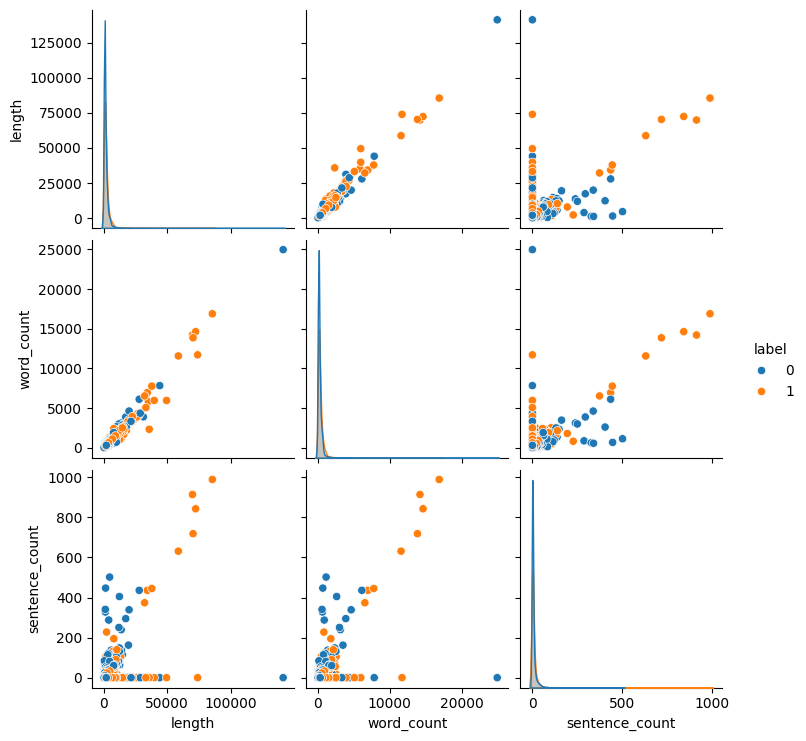

In [ ]:
sns.pairplot(df,hue='label')

<Axes: >

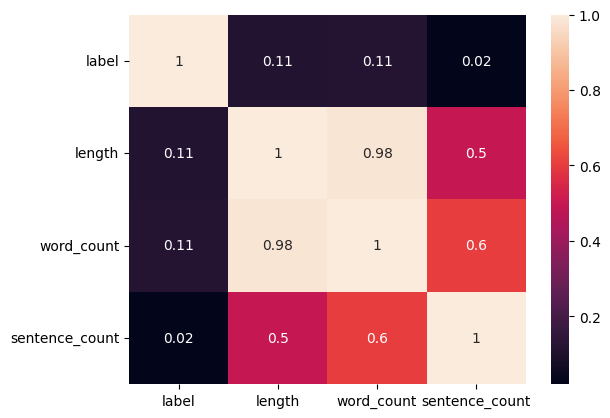

In [ ]:
numeric_df = df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [ ]:
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

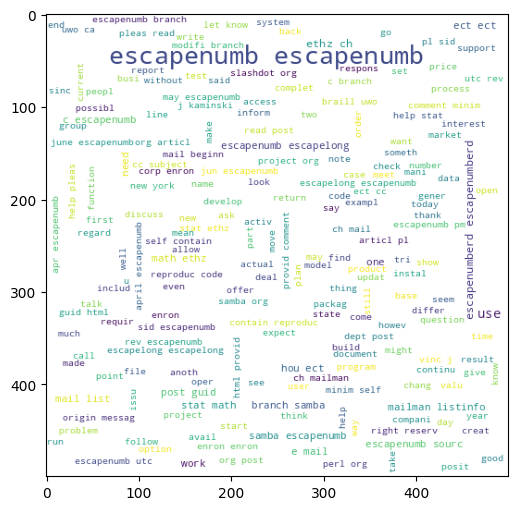

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

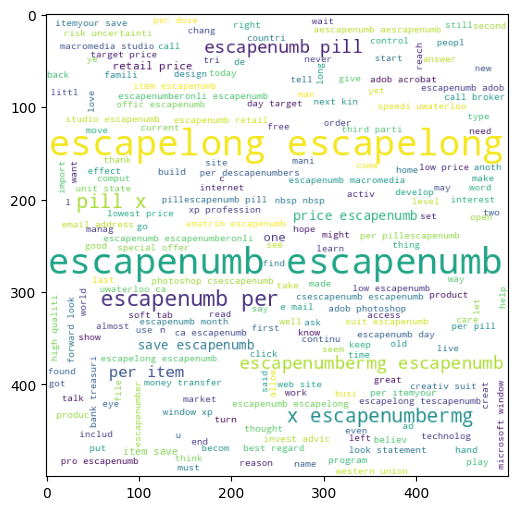

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [ ]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)


1010080

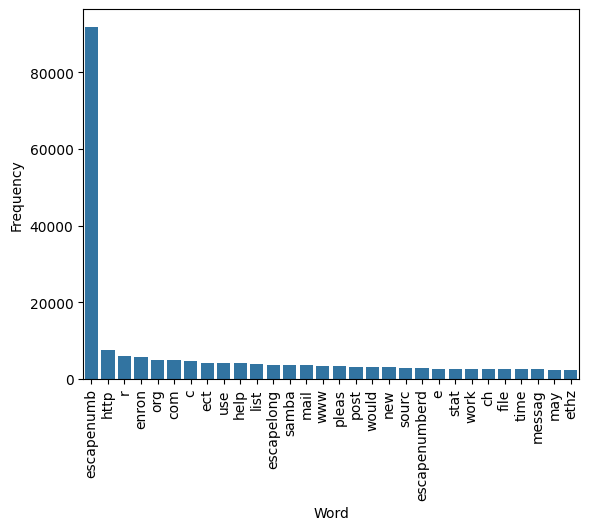

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

677739

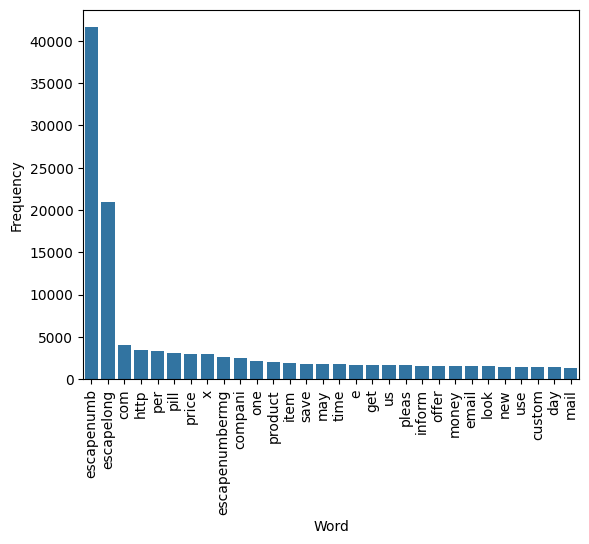

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [ ]:
df['processed_length'] = df['transformed_text'].apply(len)

In [ ]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...,619
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...,106
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...,172
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...,535
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...,440


In [ ]:
first_row = df.iloc[0]
print("Original Text:\n", first_row['text'])
print("\nTransformed Text:\n", first_row['transformed_text'])


Original Text:
 into the kingdom of god and those that are entering in he lord pardon escapenumber us in this thing we pray thee have us excused escapenumbernot therefore o escapenumber believers to look into the grave for to you it the holy ghost and escapenumber therefore being a holy habitation unto forth the words of truth and escapenumber soberness escapenumber but in all probability hath made them mad escapenumber and though escapenumber blessed be god all do that of jesus christ they see the necessity of escapenumber closing with a more than almost christians but is heaven so small a escapenumber trifle in men's esteem as not to be total renovation of the whole man escapenumber by the righteousness of complete though we be delivered from the power escapenumber we are not candle of the lord shines out and your redeemer lifts up the escapenumber inward holiness as indeed sometimes they do though in a worms destroy escapenumber them yet even in their flesh shall they see a mind to 

In [ ]:
import re

def remove_escape_words(text):
    return re.sub(r'\bescape\w*\b', '', text)

first_row['transformed_text'] = remove_escape_words(first_row['transformed_text'])

<ipython-input-150-f30d36c2c815>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_row['transformed_text'] = remove_escape_words(first_row['transformed_text'])


In [ ]:
first_row_copy = first_row.copy()

first_row_copy['transformed_text'] = remove_escape_words(first_row_copy['transformed_text'])

print("Original Text:\n", first_row['text'])
print("\nUpdated Transformed Text:\n", first_row_copy['transformed_text'])


Original Text:
 into the kingdom of god and those that are entering in he lord pardon escapenumber us in this thing we pray thee have us excused escapenumbernot therefore o escapenumber believers to look into the grave for to you it the holy ghost and escapenumber therefore being a holy habitation unto forth the words of truth and escapenumber soberness escapenumber but in all probability hath made them mad escapenumber and though escapenumber blessed be god all do that of jesus christ they see the necessity of escapenumber closing with a more than almost christians but is heaven so small a escapenumber trifle in men's esteem as not to be total renovation of the whole man escapenumber by the righteousness of complete though we be delivered from the power escapenumber we are not candle of the lord shines out and your redeemer lifts up the escapenumber inward holiness as indeed sometimes they do though in a worms destroy escapenumber them yet even in their flesh shall they see a mind to 

In [ ]:
df['transformed_text'] = df['transformed_text'].apply(remove_escape_words)

In [ ]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon us thing pray t...,619
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...,106
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric day target ...,172
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...,535
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev fix ...,440


In [ ]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

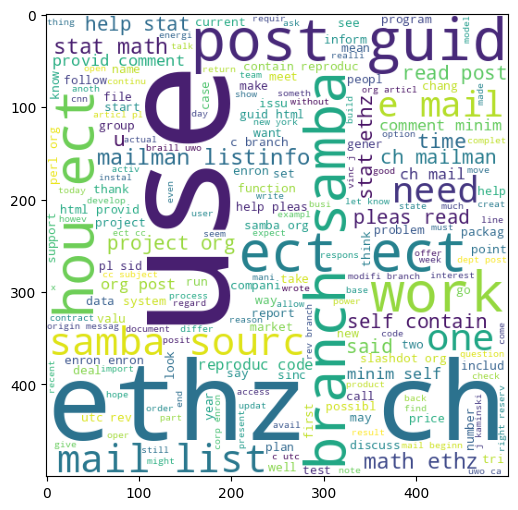

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

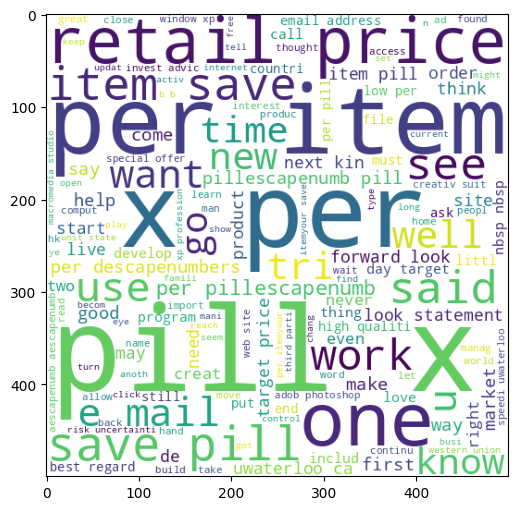

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

909604

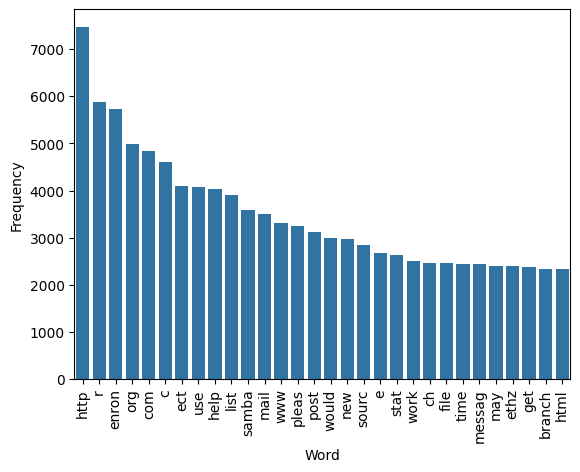

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

608764

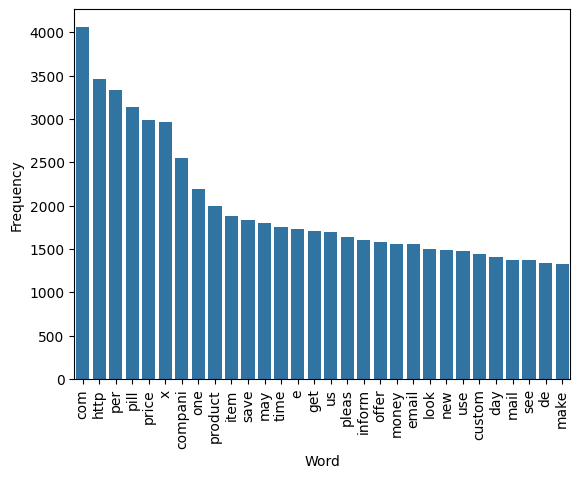

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['processed_length'] = df['transformed_text'].apply(len)

In [ ]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon us thing pray t...,464
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...,106
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric day target ...,114
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...,525
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev fix ...,410


# Intial Model Development

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(9989, 3000)

In [ ]:
y = df['label'].values


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, fbeta_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9494494494494494
[[996  53]
 [ 48 901]]
0.9444444444444444


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9524524524524525
[[1002   47]
 [  48  901]]
0.95042194092827


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8853853853853854
[[978  71]
 [158 791]]
0.9176334106728539


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    #'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)

    return accuracy, precision, recall, f2

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9684684684684685,
 0.9672995780590717,
 0.9662802950474183,
 0.9664839797639123)

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f2_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f2 = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )

    print(f"For {name}:")
    print(f"Accuracy  - {current_accuracy}")
    print(f"Precision - {current_precision}")
    print(f"Recall    - {current_recall}")
    print(f"F2 Score  - {current_f2}")
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f2_scores.append(current_f2)

For SVC:
Accuracy  - 0.9684684684684685
Precision - 0.9672995780590717
Recall    - 0.9662802950474183
F2 Score  - 0.9664839797639123

For KN:
Accuracy  - 0.7352352352352353
Precision - 0.9976303317535545
Recall    - 0.44362486828240255
F2 Score  - 0.49905168326220956

For NB:
Accuracy  - 0.9524524524524525
Precision - 0.95042194092827
Recall    - 0.9494204425711275
F2 Score  - 0.9496205733558178

For DT:
Accuracy  - 0.8388388388388388
Precision - 0.9446808510638298
Recall    - 0.7017913593256059
F2 Score  - 0.7398355920906465

For LR:
Accuracy  - 0.955955955955956
Precision - 0.9704918032786886
Recall    - 0.9357218124341412
F2 Score  - 0.9424750583740182

For RF:
Accuracy  - 0.9629629629629629
Precision - 0.9629629629629629
Recall    - 0.958904109589041
F2 Score  - 0.9597131406876186

For AdaBoost:
Accuracy  - 0.8678678678678678
Precision - 0.9477124183006536
Recall    - 0.7639620653319283
F2 Score  - 0.7947818460863846

For ETC:
Accuracy  - 0.965965965965966
Precision - 0.96319663512

In [ ]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F2 Score': f2_scores
}).sort_values('F2 Score', ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F2 Score
0,SVC,0.968468,0.967300,0.966280,0.966484
7,ETC,0.965966,0.963197,0.965227,0.964820
5,RF,0.962963,0.962963,0.958904,0.959713
2,NB,0.952452,0.950422,0.949420,0.949621
4,LR,0.955956,0.970492,0.935722,0.942475
9,xgb,0.951952,0.963084,0.934668,0.940216
8,GBDT,0.901902,0.958587,0.829294,0.852285
6,AdaBoost,0.867868,0.947712,0.763962,0.794782
3,DT,0.838839,0.944681,0.701791,0.739836
1,KN,0.735235,0.997630,0.443625,0.499052


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.968468
1,ETC,Accuracy,0.965966
2,RF,Accuracy,0.962963
3,NB,Accuracy,0.952452
4,LR,Accuracy,0.955956
5,xgb,Accuracy,0.951952
6,GBDT,Accuracy,0.901902
7,AdaBoost,Accuracy,0.867868
8,DT,Accuracy,0.838839
9,KN,Accuracy,0.735235


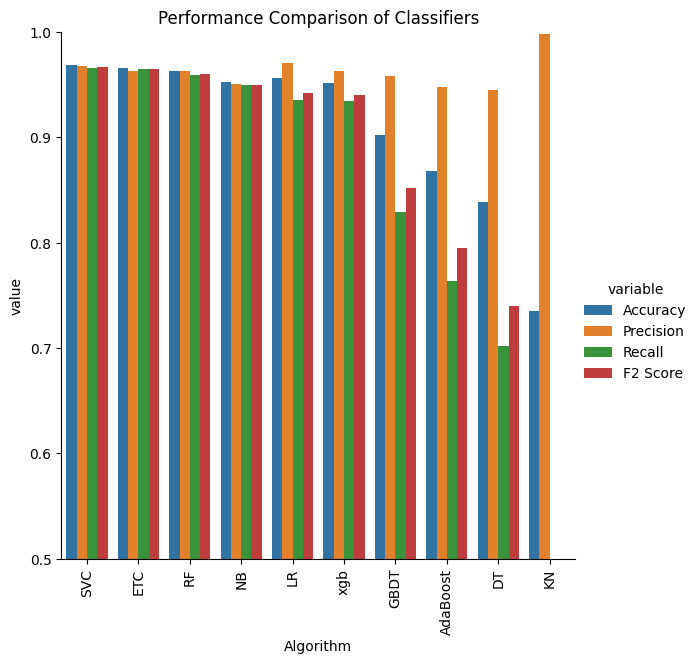

In [ ]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=6)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title("Performance Comparison of Classifiers")
plt.show()

In [ ]:
for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)
    print("\n")

Confusion Matrix for SVC:
 [[1018   31]
 [  32  917]]


Confusion Matrix for KN:
 [[1048    1]
 [ 528  421]]


Confusion Matrix for NB:
 [[1002   47]
 [  48  901]]


Confusion Matrix for DT:
 [[1010   39]
 [ 283  666]]


Confusion Matrix for LR:
 [[1022   27]
 [  61  888]]


Confusion Matrix for RF:
 [[1014   35]
 [  39  910]]


Confusion Matrix for AdaBoost:
 [[1009   40]
 [ 224  725]]


Confusion Matrix for ETC:
 [[1014   35]
 [  33  916]]


Confusion Matrix for GBDT:
 [[1015   34]
 [ 162  787]]


Confusion Matrix for xgb:
 [[1015   34]
 [  62  887]]




#Model Optimization